Index(['temperature', 'humidity', 'rainfall', 'soil_moisture', 'crop_type',
       'wind_speed', 'solar_radiation', 'soil_type', 'irrigation_requirement',
       'Column_10'],
      dtype='object')
Mean Absolute Error: 2.96
Predicted irrigation requirement: [7.35]


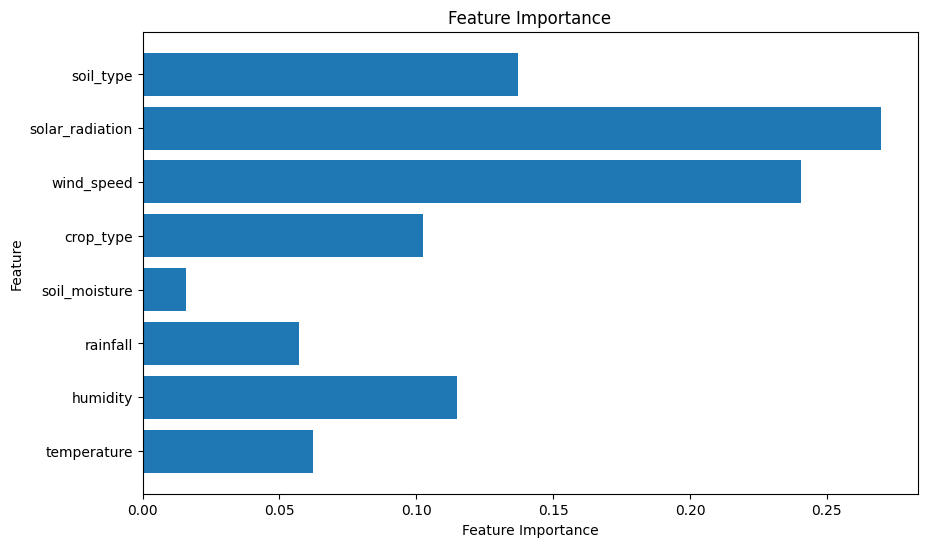

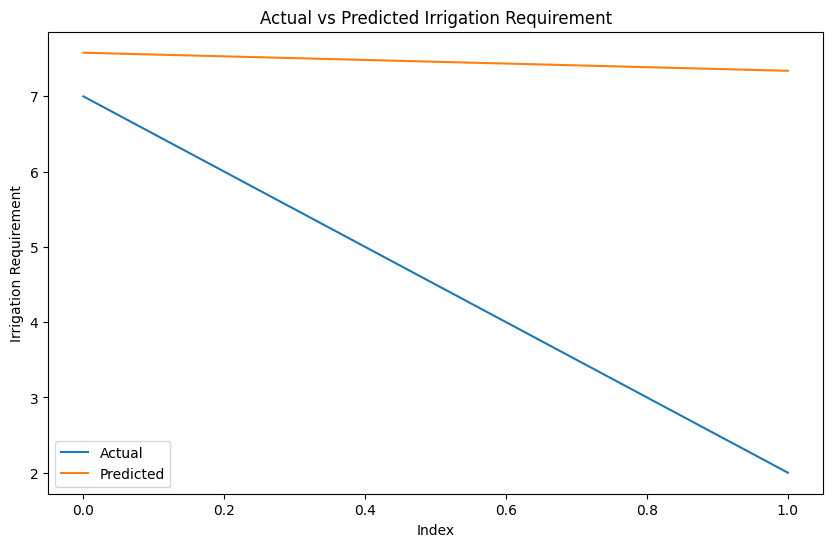

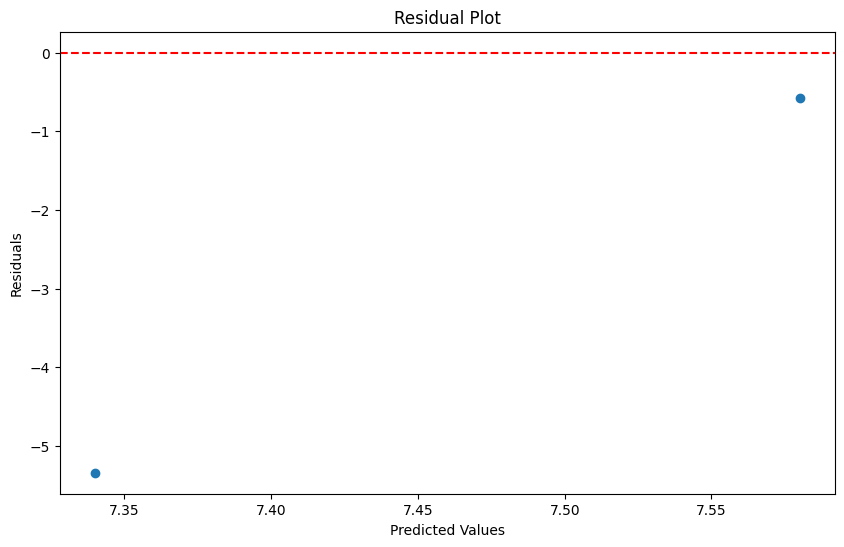

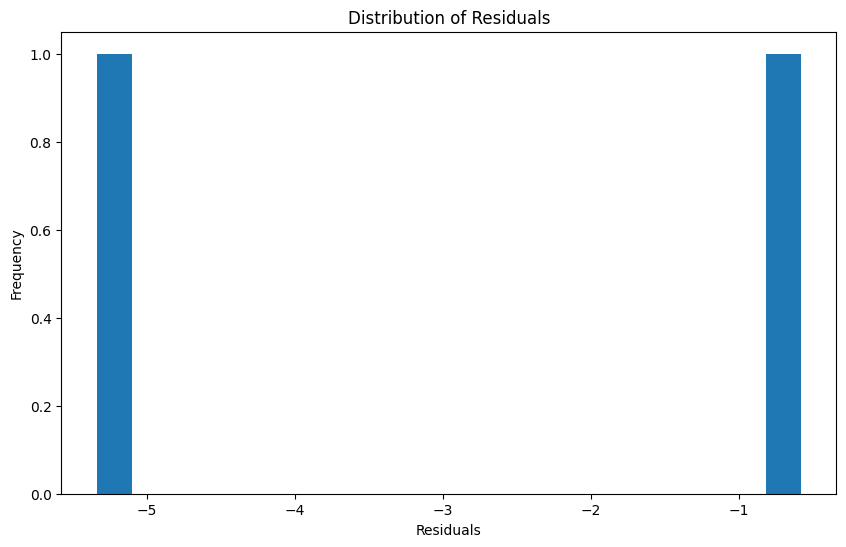

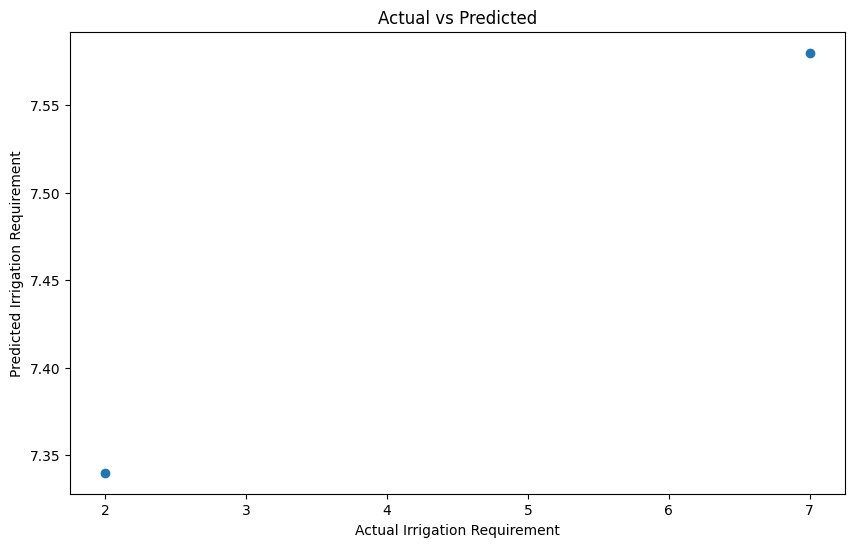

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('irrigation_data.csv')

# Preprocessing
# Here you would perform data cleaning, feature engineering, and normalization
print(data.columns)

# Select features and target variable
X = data[['temperature', 'humidity', 'rainfall', 'soil_moisture', 'crop_type', 'wind_speed', 'solar_radiation', 'soil_type']]
y = data['irrigation_requirement']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Example prediction
new_data = pd.DataFrame({'temperature': [25], 'humidity': [70], 'rainfall': [5], 'soil_moisture': [30], 'crop_type': [1], 'wind_speed': [10], 'solar_radiation': [500], 'soil_type': [2]})
prediction = model.predict(new_data)
print("Predicted irrigation requirement:", prediction)

feature_importance = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Irrigation Requirement')
plt.title('Actual vs Predicted Irrigation Requirement')
plt.legend()
plt.show()

# Visualization - Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
# Visualization - Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Visualization - Scatter Plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Irrigation Requirement')
plt.ylabel('Predicted Irrigation Requirement')
plt.title('Actual vs Predicted')
plt.show()